In [1]:
!rm -r TFFashionDetection
!git clone https://github.com/Dju999/TFFashionDetection.git
!pip install lxml
!pip install -U -q PyDrive
!pip install tqdm

Cloning into 'TFFashionDetection'...
remote: Counting objects: 59, done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 59 (delta 21), reused 21 (delta 11), pack-reused 28
Unpacking objects: 100% (59/59), done.


### Вспомогательный объект для взаимодействия с Google Drive

In [0]:
from TFFashionDetection.utils.colab_fs import GoogleColabFS

fs = GoogleColabFS()

### Загружаем [DeepFashion](http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html) датасет с [Google Drive](https://drive.google.com/drive/folders/0B7EVK8r0v71pQ2FuZ0k0QnhBQnc)

In [0]:
# скачиваем файлы для обучения с Google Drive
!python3 /content/TFFashionDetection/utils/dataset_download.py

tcmalloc: large alloc 2681200640 bytes == 0xa2e76000 @  0x7f2738103107 0x424aa5 0x4668fb 0x467e18 0x4c4add 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54ffee 0x48b86d


### Устанавливаем Tensorflow Object Detection API

In [4]:
# загружаем репозиторий, добавляем в PYTHONPATH
! cd /content; git clone https://github.com/tensorflow/models.git
# установка зависимостей для object detection тут 
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!cd /content; git clone https://github.com/cocodataset/cocoapi.git; cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/
!cd /content/models/research; protoc object_detection/protos/*.proto --python_out=.
# проверка
!cd /content/models/research; export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim; python object_detection/builders/model_builder_test.py

Cloning into 'models'...
remote: Counting objects: 17110, done.
remote: Total 17110 (delta 2), reused 2 (delta 2), pack-reused 17107
Receiving objects: 100% (17110/17110), 469.70 MiB | 41.92 MiB/s, done.
Resolving deltas: 100% (10097/10097), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.14-1).
The following additional packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  liblcms2-utils python-genshi python-lxml-dbg python-lxml-doc python-pil-doc
  python-pil-dbg python-setuptools
The following NEW packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 protobuf-compiler python-bs4 python-chardet python-html5lib
  python-lxml pytho

Selecting previously unselected package python-html5lib.
Preparing to unpack .../13-python-html5lib_0.999999999-1_all.deb ...
Unpacking python-html5lib (0.999999999-1) ...
Selecting previously unselected package python-lxml.
Preparing to unpack .../14-python-lxml_4.0.0-1_amd64.deb ...
Unpacking python-lxml (4.0.0-1) ...
Selecting previously unselected package python-olefile.
Preparing to unpack .../15-python-olefile_0.44-1_all.deb ...
Unpacking python-olefile (0.44-1) ...
Selecting previously unselected package python-pil:amd64.
Preparing to unpack .../16-python-pil_4.1.1-3build2_amd64.deb ...
Unpacking python-pil:amd64 (4.1.1-3build2) ...
Selecting previously unselected package protobuf-compiler.
Preparing to unpack .../17-protobuf-compiler_3.0.0-9ubuntu5_amd64.deb ...
Unpacking protobuf-compiler (3.0.0-9ubuntu5) ...
Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Setting up python-pkg-resources (3

copying build/lib.linux-x86_64-3.6/pycocotools/_mask.cpython-36m-x86_64-linux-gnu.so -> pycocotools
rm -rf build
/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
...............
----------------------------------------------------------------------
Ran 15 tests in 0.064s

OK


### Готовим данные для TEnsorflow API: файлы TFRecod, XML

Создаём структуру директорий в рабочем каталоге

In [5]:
import sys
import os

import numpy as np

API_PATH = os.path.join('/content', 'models/research')
sys.path.append(API_PATH)

DETECTOR_PATH = os.path.join('/content', 'TFFashionDetection')
sys.path.append(DETECTOR_PATH)

from TFFashionDetection.data_preparator import DataPreparator
from TFFashionDetection.utils.ssd_config import write_config

data_preparator = DataPreparator()
data_preparator.build()
write_config('ssd_mobilenet_v2_coco_2018_03_29')

Сохраняем информацию о категориях товаров
Создали директорию /content/data_dir/data
Распределение примеров по классам: Counter({1: 58568, 2: 58568, 3: 58568})
Распределение примеров для оценки качества: Counter({'train': 127347, 'val': 24291, 'test': 24066})
Генерим описания для сцeнария train
Создали файл формата TFRecords: /content/data_dir/annotations/train.record
Генерим описания для сцeнария test
Создали файл формата TFRecords: /content/data_dir/annotations/test.record
Создали XML в директории: /content/data_dir/annotations/xmls
Файл с метками классов: /content/data_dir/annotations/label_map.pbtxt
Config written to /content/data_dir/tf_api.config
Checkpoints in /content/data_dir/checkpoints
Train data from /content/data_dir/annotations


In [9]:
# скачиваем модель (предобученную)
!python /content/TFFashionDetection/utils/download_tf_zoo_model.py --name ssd_mobilenet_v2_coco_2018_03_29 --dir /content

Модели сохранены в /content/frozen_model


### Обучаем модель детекции

In [10]:
!export PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research/;python /content/models/research/object_detection/train.py --logtostderr --pipeline_config_path=/content/data_dir/tf_api.config --train_dir=/content/data_dir/checkpoints

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.create_global_step
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


INFO:tensorflow:Restoring parameters from /content/frozen_model/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt
INFO:tensorflow:Restoring parameters from /content/frozen_model/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Recording summary at step 0.
INFO:tensorflow:Recording summary at step 0.
INFO:tensorflow:global step 1: loss = 18.1664 (46.353 sec/step)
INFO:tensorflow:global step 1: loss = 18.1664 (46.353 sec/step)
INFO:tensorflow:global step 2:

INFO:tensorflow:global step 28: loss = 10.6639 (16.397 sec/step)
INFO:tensorflow:global step 28: loss = 10.6639 (16.397 sec/step)
INFO:tensorflow:global step 29: loss = 11.0217 (16.503 sec/step)
INFO:tensorflow:global step 29: loss = 11.0217 (16.503 sec/step)
INFO:tensorflow:global step 30: loss = 10.6317 (16.479 sec/step)
INFO:tensorflow:global step 30: loss = 10.6317 (16.479 sec/step)
INFO:tensorflow:global step 31: loss = 10.3957 (16.467 sec/step)
INFO:tensorflow:global step 31: loss = 10.3957 (16.467 sec/step)
INFO:tensorflow:global step 32: loss = 10.1445 (16.503 sec/step)
INFO:tensorflow:global step 32: loss = 10.1445 (16.503 sec/step)
INFO:tensorflow:global step 33: loss = 10.3551 (16.499 sec/step)
INFO:tensorflow:global step 33: loss = 10.3551 (16.499 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 33.
INFO:ten

INFO:tensorflow:global step 58: loss = 8.7934 (16.627 sec/step)
INFO:tensorflow:global step 58: loss = 8.7934 (16.627 sec/step)
INFO:tensorflow:global step 59: loss = 8.8418 (16.530 sec/step)
INFO:tensorflow:global step 59: loss = 8.8418 (16.530 sec/step)
INFO:tensorflow:global step 60: loss = 8.9107 (16.578 sec/step)
INFO:tensorflow:global step 60: loss = 8.9107 (16.578 sec/step)
INFO:tensorflow:global_step/sec: 0.0612932
INFO:tensorflow:global_step/sec: 0.0612932
INFO:tensorflow:global step 61: loss = 8.6599 (19.674 sec/step)
INFO:tensorflow:global step 61: loss = 8.6599 (19.674 sec/step)
INFO:tensorflow:Recording summary at step 61.
INFO:tensorflow:Recording summary at step 61.
INFO:tensorflow:global step 62: loss = 8.6507 (18.528 sec/step)
INFO:tensorflow:global step 62: loss = 8.6507 (18.528 sec/step)
INFO:tensorflow:global step 63: loss = 8.3183 (16.566 sec/step)
INFO:tensorflow:global step 63: loss = 8.3183 (16.566 sec/step)
INFO:tensorflow:global step 64: loss = 8.0501 (16.556 

INFO:tensorflow:global step 90: loss = 8.2877 (16.477 sec/step)
INFO:tensorflow:global step 90: loss = 8.2877 (16.477 sec/step)
INFO:tensorflow:global step 91: loss = 7.8303 (16.534 sec/step)
INFO:tensorflow:global step 91: loss = 7.8303 (16.534 sec/step)
INFO:tensorflow:global step 92: loss = 7.5835 (16.530 sec/step)
INFO:tensorflow:global step 92: loss = 7.5835 (16.530 sec/step)
INFO:tensorflow:global step 93: loss = 7.7137 (16.546 sec/step)
INFO:tensorflow:global step 93: loss = 7.7137 (16.546 sec/step)
INFO:tensorflow:global step 94: loss = 7.5459 (16.478 sec/step)
INFO:tensorflow:global step 94: loss = 7.5459 (16.478 sec/step)
INFO:tensorflow:global step 95: loss = 7.7149 (16.452 sec/step)
INFO:tensorflow:global step 95: loss = 7.7149 (16.452 sec/step)
INFO:tensorflow:Recording summary at step 95.
INFO:tensorflow:Recording summary at step 95.
INFO:tensorflow:global step 96: loss = 7.4591 (21.863 sec/step)
INFO:tensorflow:global step 96: loss = 7.4591 (21.863 sec/step)
INFO:tensorf

INFO:tensorflow:global step 123: loss = 7.4700 (16.550 sec/step)
INFO:tensorflow:global step 123: loss = 7.4700 (16.550 sec/step)
INFO:tensorflow:Recording summary at step 123.
INFO:tensorflow:Recording summary at step 123.
INFO:tensorflow:global step 124: loss = 7.3459 (21.819 sec/step)
INFO:tensorflow:global step 124: loss = 7.3459 (21.819 sec/step)
INFO:tensorflow:global step 125: loss = 7.8288 (16.513 sec/step)
INFO:tensorflow:global step 125: loss = 7.8288 (16.513 sec/step)
INFO:tensorflow:global step 126: loss = 7.8468 (16.467 sec/step)
INFO:tensorflow:global step 126: loss = 7.8468 (16.467 sec/step)
INFO:tensorflow:global step 127: loss = 7.6279 (16.488 sec/step)
INFO:tensorflow:global step 127: loss = 7.6279 (16.488 sec/step)
INFO:tensorflow:global step 128: loss = 7.6415 (16.588 sec/step)
INFO:tensorflow:global step 128: loss = 7.6415 (16.588 sec/step)
INFO:tensorflow:global step 129: loss = 7.3457 (16.454 sec/step)
INFO:tensorflow:global step 129: loss = 7.3457 (16.454 sec/st

INFO:tensorflow:global step 156: loss = 7.6532 (16.460 sec/step)
INFO:tensorflow:global step 156: loss = 7.6532 (16.460 sec/step)
INFO:tensorflow:global step 157: loss = 7.6903 (16.494 sec/step)
INFO:tensorflow:global step 157: loss = 7.6903 (16.494 sec/step)
INFO:tensorflow:global step 158: loss = 7.2533 (20.607 sec/step)
INFO:tensorflow:global step 158: loss = 7.2533 (20.607 sec/step)
INFO:tensorflow:Recording summary at step 158.
INFO:tensorflow:Recording summary at step 158.
INFO:tensorflow:global step 159: loss = 7.2573 (17.439 sec/step)
INFO:tensorflow:global step 159: loss = 7.2573 (17.439 sec/step)
INFO:tensorflow:global step 160: loss = 7.9000 (16.485 sec/step)
INFO:tensorflow:global step 160: loss = 7.9000 (16.485 sec/step)
INFO:tensorflow:global step 161: loss = 6.9687 (16.412 sec/step)
INFO:tensorflow:global step 161: loss = 6.9687 (16.412 sec/step)
INFO:tensorflow:global step 162: loss = 6.9326 (16.517 sec/step)
INFO:tensorflow:global step 162: loss = 6.9326 (16.517 sec/st

INFO:tensorflow:global step 189: loss = 8.6489 (16.510 sec/step)
INFO:tensorflow:global step 189: loss = 8.6489 (16.510 sec/step)
INFO:tensorflow:global step 190: loss = 7.8800 (16.536 sec/step)
INFO:tensorflow:global step 190: loss = 7.8800 (16.536 sec/step)
INFO:tensorflow:global step 191: loss = 8.4829 (16.530 sec/step)
INFO:tensorflow:global step 191: loss = 8.4829 (16.530 sec/step)
INFO:tensorflow:global step 192: loss = 7.5549 (16.493 sec/step)
INFO:tensorflow:global step 192: loss = 7.5549 (16.493 sec/step)
INFO:tensorflow:Recording summary at step 192.
INFO:tensorflow:Recording summary at step 192.
INFO:tensorflow:global step 193: loss = 8.2272 (21.954 sec/step)
INFO:tensorflow:global step 193: loss = 8.2272 (21.954 sec/step)
INFO:tensorflow:global step 194: loss = 7.7872 (16.463 sec/step)
INFO:tensorflow:global step 194: loss = 7.7872 (16.463 sec/step)
INFO:tensorflow:global step 195: loss = 7.4381 (16.493 sec/step)
INFO:tensorflow:global step 195: loss = 7.4381 (16.493 sec/st

INFO:tensorflow:global step 222: loss = 6.7236 (16.329 sec/step)
INFO:tensorflow:global step 222: loss = 6.7236 (16.329 sec/step)
INFO:tensorflow:global step 223: loss = 7.7168 (16.470 sec/step)
INFO:tensorflow:global step 223: loss = 7.7168 (16.470 sec/step)
INFO:tensorflow:global step 224: loss = 7.4874 (16.517 sec/step)
INFO:tensorflow:global step 224: loss = 7.4874 (16.517 sec/step)
INFO:tensorflow:global step 225: loss = 7.5075 (16.442 sec/step)
INFO:tensorflow:global step 225: loss = 7.5075 (16.442 sec/step)
INFO:tensorflow:global step 226: loss = 8.1346 (16.518 sec/step)
INFO:tensorflow:global step 226: loss = 8.1346 (16.518 sec/step)
INFO:tensorflow:global step 227: loss = 7.5473 (16.487 sec/step)
INFO:tensorflow:global step 227: loss = 7.5473 (16.487 sec/step)
INFO:tensorflow:Recording summary at step 227.
INFO:tensorflow:Recording summary at step 227.
INFO:tensorflow:global step 228: loss = 8.0420 (21.850 sec/step)
INFO:tensorflow:global step 228: loss = 8.0420 (21.850 sec/st

INFO:tensorflow:Recording summary at step 255.
INFO:tensorflow:Recording summary at step 255.
INFO:tensorflow:global step 256: loss = 6.8796 (18.662 sec/step)
INFO:tensorflow:global step 256: loss = 6.8796 (18.662 sec/step)
INFO:tensorflow:global step 257: loss = 6.7256 (16.519 sec/step)
INFO:tensorflow:global step 257: loss = 6.7256 (16.519 sec/step)
INFO:tensorflow:global step 258: loss = 6.3142 (16.505 sec/step)
INFO:tensorflow:global step 258: loss = 6.3142 (16.505 sec/step)
INFO:tensorflow:global step 259: loss = 6.8299 (16.588 sec/step)
INFO:tensorflow:global step 259: loss = 6.8299 (16.588 sec/step)
INFO:tensorflow:global step 260: loss = 6.4625 (16.540 sec/step)
INFO:tensorflow:global step 260: loss = 6.4625 (16.540 sec/step)
INFO:tensorflow:global step 261: loss = 7.9671 (16.553 sec/step)
INFO:tensorflow:global step 261: loss = 7.9671 (16.553 sec/step)
INFO:tensorflow:global step 262: loss = 8.1365 (20.500 sec/step)
INFO:tensorflow:global step 262: loss = 8.1365 (20.500 sec/st

INFO:tensorflow:global step 288: loss = 6.8059 (16.499 sec/step)
INFO:tensorflow:global step 288: loss = 6.8059 (16.499 sec/step)
INFO:tensorflow:global step 289: loss = 6.6684 (16.434 sec/step)
INFO:tensorflow:global step 289: loss = 6.6684 (16.434 sec/step)
INFO:tensorflow:Recording summary at step 289.
INFO:tensorflow:Recording summary at step 289.
INFO:tensorflow:global step 290: loss = 7.0553 (21.877 sec/step)
INFO:tensorflow:global step 290: loss = 7.0553 (21.877 sec/step)
INFO:tensorflow:global step 291: loss = 6.5281 (16.461 sec/step)
INFO:tensorflow:global step 291: loss = 6.5281 (16.461 sec/step)
INFO:tensorflow:global step 292: loss = 6.8024 (16.471 sec/step)
INFO:tensorflow:global step 292: loss = 6.8024 (16.471 sec/step)
INFO:tensorflow:global step 293: loss = 6.9985 (16.398 sec/step)
INFO:tensorflow:global step 293: loss = 6.9985 (16.398 sec/step)
INFO:tensorflow:global step 294: loss = 6.9884 (16.484 sec/step)
INFO:tensorflow:global step 294: loss = 6.9884 (16.484 sec/st

INFO:tensorflow:global step 321: loss = 6.9266 (16.442 sec/step)
INFO:tensorflow:global step 321: loss = 6.9266 (16.442 sec/step)
INFO:tensorflow:global step 322: loss = 7.1175 (16.483 sec/step)
INFO:tensorflow:global step 322: loss = 7.1175 (16.483 sec/step)
INFO:tensorflow:global step 323: loss = 6.0498 (16.538 sec/step)
INFO:tensorflow:global step 323: loss = 6.0498 (16.538 sec/step)
INFO:tensorflow:global step 324: loss = 6.7155 (16.416 sec/step)
INFO:tensorflow:global step 324: loss = 6.7155 (16.416 sec/step)
INFO:tensorflow:Recording summary at step 324.
INFO:tensorflow:Recording summary at step 324.
INFO:tensorflow:global step 325: loss = 6.9254 (21.878 sec/step)
INFO:tensorflow:global step 325: loss = 6.9254 (21.878 sec/step)
INFO:tensorflow:global step 326: loss = 6.4460 (16.485 sec/step)
INFO:tensorflow:global step 326: loss = 6.4460 (16.485 sec/step)
INFO:tensorflow:global step 327: loss = 6.2525 (16.497 sec/step)
INFO:tensorflow:global step 327: loss = 6.2525 (16.497 sec/st

INFO:tensorflow:global step 353: loss = 6.5734 (18.499 sec/step)
INFO:tensorflow:global step 353: loss = 6.5734 (18.499 sec/step)
INFO:tensorflow:global step 354: loss = 6.4591 (16.440 sec/step)
INFO:tensorflow:global step 354: loss = 6.4591 (16.440 sec/step)
INFO:tensorflow:global step 355: loss = 6.1888 (16.441 sec/step)
INFO:tensorflow:global step 355: loss = 6.1888 (16.441 sec/step)
INFO:tensorflow:global step 356: loss = 7.4400 (16.457 sec/step)
INFO:tensorflow:global step 356: loss = 7.4400 (16.457 sec/step)
INFO:tensorflow:global step 357: loss = 6.4392 (16.527 sec/step)
INFO:tensorflow:global step 357: loss = 6.4392 (16.527 sec/step)
INFO:tensorflow:global step 358: loss = 6.1605 (16.464 sec/step)
INFO:tensorflow:global step 358: loss = 6.1605 (16.464 sec/step)
INFO:tensorflow:global step 359: loss = 6.1647 (19.982 sec/step)
INFO:tensorflow:global step 359: loss = 6.1647 (19.982 sec/step)
INFO:tensorflow:Recording summary at step 359.
INFO:tensorflow:Recording summary at step 3

INFO:tensorflow:global step 386: loss = 7.2410 (16.457 sec/step)
INFO:tensorflow:global step 386: loss = 7.2410 (16.457 sec/step)
INFO:tensorflow:Recording summary at step 386.
INFO:tensorflow:Recording summary at step 386.
INFO:tensorflow:global step 387: loss = 7.1833 (22.018 sec/step)
INFO:tensorflow:global step 387: loss = 7.1833 (22.018 sec/step)
INFO:tensorflow:global step 388: loss = 7.2463 (16.486 sec/step)
INFO:tensorflow:global step 388: loss = 7.2463 (16.486 sec/step)
INFO:tensorflow:global step 389: loss = 7.9433 (16.422 sec/step)
INFO:tensorflow:global step 389: loss = 7.9433 (16.422 sec/step)
INFO:tensorflow:global step 390: loss = 7.0578 (16.457 sec/step)
INFO:tensorflow:global step 390: loss = 7.0578 (16.457 sec/step)
INFO:tensorflow:global step 391: loss = 7.0220 (16.526 sec/step)
INFO:tensorflow:global step 391: loss = 7.0220 (16.526 sec/step)
INFO:tensorflow:global step 392: loss = 7.4421 (16.508 sec/step)
INFO:tensorflow:global step 392: loss = 7.4421 (16.508 sec/st

INFO:tensorflow:global step 419: loss = 7.5777 (16.486 sec/step)
INFO:tensorflow:global step 419: loss = 7.5777 (16.486 sec/step)
INFO:tensorflow:global step 420: loss = 6.9982 (16.469 sec/step)
INFO:tensorflow:global step 420: loss = 6.9982 (16.469 sec/step)
INFO:tensorflow:global step 421: loss = 6.9442 (16.501 sec/step)
INFO:tensorflow:global step 421: loss = 6.9442 (16.501 sec/step)
INFO:tensorflow:Recording summary at step 421.
INFO:tensorflow:Recording summary at step 421.
INFO:tensorflow:global step 422: loss = 6.0823 (21.655 sec/step)
INFO:tensorflow:global step 422: loss = 6.0823 (21.655 sec/step)
INFO:tensorflow:global step 423: loss = 7.0658 (16.535 sec/step)
INFO:tensorflow:global step 423: loss = 7.0658 (16.535 sec/step)
INFO:tensorflow:global step 424: loss = 7.2379 (16.565 sec/step)
INFO:tensorflow:global step 424: loss = 7.2379 (16.565 sec/step)
INFO:tensorflow:global step 425: loss = 6.7717 (16.570 sec/step)
INFO:tensorflow:global step 425: loss = 6.7717 (16.570 sec/st

INFO:tensorflow:global step 452: loss = 8.3413 (16.505 sec/step)
INFO:tensorflow:global step 452: loss = 8.3413 (16.505 sec/step)
INFO:tensorflow:global step 453: loss = 7.6978 (16.539 sec/step)
INFO:tensorflow:global step 453: loss = 7.6978 (16.539 sec/step)
INFO:tensorflow:global step 454: loss = 7.7368 (16.510 sec/step)
INFO:tensorflow:global step 454: loss = 7.7368 (16.510 sec/step)
INFO:tensorflow:global step 455: loss = 6.5932 (16.487 sec/step)
INFO:tensorflow:global step 455: loss = 6.5932 (16.487 sec/step)
INFO:tensorflow:Recording summary at step 455.
INFO:tensorflow:Recording summary at step 455.
INFO:tensorflow:global step 456: loss = 7.8522 (21.889 sec/step)
INFO:tensorflow:global step 456: loss = 7.8522 (21.889 sec/step)
INFO:tensorflow:global step 457: loss = 7.7835 (16.519 sec/step)
INFO:tensorflow:global step 457: loss = 7.7835 (16.519 sec/step)
INFO:tensorflow:global step 458: loss = 6.5540 (16.460 sec/step)
INFO:tensorflow:global step 458: loss = 6.5540 (16.460 sec/st

INFO:tensorflow:global step 485: loss = 7.9041 (16.495 sec/step)
INFO:tensorflow:global step 485: loss = 7.9041 (16.495 sec/step)
INFO:tensorflow:global step 486: loss = 7.9169 (16.531 sec/step)
INFO:tensorflow:global step 486: loss = 7.9169 (16.531 sec/step)
INFO:tensorflow:global step 487: loss = 7.8844 (16.469 sec/step)
INFO:tensorflow:global step 487: loss = 7.8844 (16.469 sec/step)
INFO:tensorflow:global step 488: loss = 8.3886 (16.465 sec/step)
INFO:tensorflow:global step 488: loss = 8.3886 (16.465 sec/step)
INFO:tensorflow:global step 489: loss = 7.6624 (16.621 sec/step)
INFO:tensorflow:global step 489: loss = 7.6624 (16.621 sec/step)
INFO:tensorflow:global step 490: loss = 7.5482 (16.420 sec/step)
INFO:tensorflow:global step 490: loss = 7.5482 (16.420 sec/step)
INFO:tensorflow:Recording summary at step 490.
INFO:tensorflow:Recording summary at step 490.
INFO:tensorflow:global step 491: loss = 7.2735 (22.015 sec/step)
INFO:tensorflow:global step 491: loss = 7.2735 (22.015 sec/st

INFO:tensorflow:Recording summary at step 518.
INFO:tensorflow:Recording summary at step 518.
INFO:tensorflow:global step 519: loss = 6.3651 (19.920 sec/step)
INFO:tensorflow:global step 519: loss = 6.3651 (19.920 sec/step)
INFO:tensorflow:global step 520: loss = 6.2369 (16.531 sec/step)
INFO:tensorflow:global step 520: loss = 6.2369 (16.531 sec/step)
INFO:tensorflow:global step 521: loss = 6.7282 (16.484 sec/step)
INFO:tensorflow:global step 521: loss = 6.7282 (16.484 sec/step)
INFO:tensorflow:global step 522: loss = 7.9885 (16.479 sec/step)
INFO:tensorflow:global step 522: loss = 7.9885 (16.479 sec/step)
INFO:tensorflow:global step 523: loss = 8.3289 (16.526 sec/step)
INFO:tensorflow:global step 523: loss = 8.3289 (16.526 sec/step)
INFO:tensorflow:global step 524: loss = 7.7579 (16.493 sec/step)
INFO:tensorflow:global step 524: loss = 7.7579 (16.493 sec/step)
INFO:tensorflow:global step 525: loss = 8.2450 (20.134 sec/step)
INFO:tensorflow:global step 525: loss = 8.2450 (20.134 sec/st

INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 552.
INFO:tensorflow:Recording summary at step 552.
INFO:tensorflow:global step 553: loss = 6.5331 (24.176 sec/step)
INFO:tensorflow:global step 553: loss = 6.5331 (24.176 sec/step)
INFO:tensorflow:global step 554: loss = 6.4818 (16.589 sec/step)
INFO:tensorflow:global step 554: loss = 6.4818 (16.589 sec/step)
INFO:tensorflow:global step 555: loss = 6.0854 (16.515 sec/step)
INFO:tensorflow:global step 555: loss = 6.0854 (16.515 sec/step)
INFO:tensorflow:global step 556: loss = 6.4071 (16.458 sec/step)
INFO:tensorflow:global step 556: loss = 6.4071 (16.458 sec/step)
INFO:tensorflow:global step 557: loss = 6.2750 (16.526 sec/step)
INFO:tensorflow:global step 557: loss = 6.2750 (16.526 sec/step)
INFO:tensorflow:global step 558: loss = 6.5104 (16.529 sec/step)
INFO:tensorflow:global st

INFO:tensorflow:global step 586: loss = 6.3133 (16.485 sec/step)
INFO:tensorflow:global step 586: loss = 6.3133 (16.485 sec/step)
INFO:tensorflow:global step 587: loss = 6.2100 (16.514 sec/step)
INFO:tensorflow:global step 587: loss = 6.2100 (16.514 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 587.
INFO:tensorflow:Recording summary at step 587.
INFO:tensorflow:global step 588: loss = 6.9942 (23.963 sec/step)
INFO:tensorflow:global step 588: loss = 6.9942 (23.963 sec/step)
INFO:tensorflow:global step 589: loss = 6.4627 (16.605 sec/step)
INFO:tensorflow:global step 589: loss = 6.4627 (16.605 sec/step)
INFO:tensorflow:global step 590: loss = 7.1459 (16.523 sec/step)
INFO:tensorflow:global step 590: loss = 7.1459 (16.523 sec/step)
INFO:tensorflow:global step 591: loss = 6.8610 (16.454 sec/step)
INFO:tensorflow:global st

INFO:tensorflow:global step 618: loss = 6.2798 (16.471 sec/step)
INFO:tensorflow:global step 618: loss = 6.2798 (16.471 sec/step)
INFO:tensorflow:global step 619: loss = 6.2969 (16.519 sec/step)
INFO:tensorflow:global step 619: loss = 6.2969 (16.519 sec/step)
INFO:tensorflow:global step 620: loss = 6.3483 (16.525 sec/step)
INFO:tensorflow:global step 620: loss = 6.3483 (16.525 sec/step)
INFO:tensorflow:global step 621: loss = 6.5007 (16.547 sec/step)
INFO:tensorflow:global step 621: loss = 6.5007 (16.547 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:global step 622: loss = 5.9832 (20.760 sec/step)
INFO:tensorflow:global step 622: loss = 5.9832 (20.760 sec/step)
INFO:tensorflow:Recording summary at step 622.
INFO:tensorflow:Recording summary at step 622.
INFO:tensorflow:global step 623: loss = 6.2594 (19.305 sec/step)
INFO:tensorflow:global st

INFO:tensorflow:global step 650: loss = 6.1597 (21.791 sec/step)
INFO:tensorflow:global step 650: loss = 6.1597 (21.791 sec/step)
INFO:tensorflow:global step 651: loss = 6.6219 (16.428 sec/step)
INFO:tensorflow:global step 651: loss = 6.6219 (16.428 sec/step)
INFO:tensorflow:global step 652: loss = 6.2410 (16.498 sec/step)
INFO:tensorflow:global step 652: loss = 6.2410 (16.498 sec/step)
INFO:tensorflow:global step 653: loss = 6.5881 (16.428 sec/step)
INFO:tensorflow:global step 653: loss = 6.5881 (16.428 sec/step)
INFO:tensorflow:global step 654: loss = 7.3650 (16.342 sec/step)
INFO:tensorflow:global step 654: loss = 7.3650 (16.342 sec/step)
INFO:tensorflow:global step 655: loss = 6.4534 (16.423 sec/step)
INFO:tensorflow:global step 655: loss = 6.4534 (16.423 sec/step)
INFO:tensorflow:global step 656: loss = 6.7130 (16.462 sec/step)
INFO:tensorflow:global step 656: loss = 6.7130 (16.462 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:te

INFO:tensorflow:global step 684: loss = 6.5013 (16.454 sec/step)
INFO:tensorflow:global step 684: loss = 6.5013 (16.454 sec/step)
INFO:tensorflow:Recording summary at step 684.
INFO:tensorflow:Recording summary at step 684.
INFO:tensorflow:global step 685: loss = 7.3258 (21.761 sec/step)
INFO:tensorflow:global step 685: loss = 7.3258 (21.761 sec/step)
INFO:tensorflow:global step 686: loss = 7.0764 (16.561 sec/step)
INFO:tensorflow:global step 686: loss = 7.0764 (16.561 sec/step)
INFO:tensorflow:global step 687: loss = 6.5217 (16.499 sec/step)
INFO:tensorflow:global step 687: loss = 6.5217 (16.499 sec/step)
INFO:tensorflow:global step 688: loss = 7.0059 (16.587 sec/step)
INFO:tensorflow:global step 688: loss = 7.0059 (16.587 sec/step)
INFO:tensorflow:global step 689: loss = 6.0700 (16.542 sec/step)
INFO:tensorflow:global step 689: loss = 6.0700 (16.542 sec/step)
INFO:tensorflow:global step 690: loss = 6.8701 (16.661 sec/step)
INFO:tensorflow:global step 690: loss = 6.8701 (16.661 sec/st

INFO:tensorflow:global step 716: loss = 7.5053 (16.487 sec/step)
INFO:tensorflow:global step 716: loss = 7.5053 (16.487 sec/step)
INFO:tensorflow:global step 717: loss = 7.2491 (16.472 sec/step)
INFO:tensorflow:global step 717: loss = 7.2491 (16.472 sec/step)
INFO:tensorflow:global step 718: loss = 7.1792 (16.513 sec/step)
INFO:tensorflow:global step 718: loss = 7.1792 (16.513 sec/step)
INFO:tensorflow:Recording summary at step 718.
INFO:tensorflow:Recording summary at step 718.
INFO:tensorflow:global step 719: loss = 7.0315 (21.823 sec/step)
INFO:tensorflow:global step 719: loss = 7.0315 (21.823 sec/step)
INFO:tensorflow:global step 720: loss = 7.5651 (16.450 sec/step)
INFO:tensorflow:global step 720: loss = 7.5651 (16.450 sec/step)
INFO:tensorflow:global step 721: loss = 7.1361 (16.545 sec/step)
INFO:tensorflow:global step 721: loss = 7.1361 (16.545 sec/step)
INFO:tensorflow:global step 722: loss = 7.2505 (16.414 sec/step)
INFO:tensorflow:global step 722: loss = 7.2505 (16.414 sec/st

INFO:tensorflow:global step 749: loss = 7.7197 (16.569 sec/step)
INFO:tensorflow:global step 749: loss = 7.7197 (16.569 sec/step)
INFO:tensorflow:global step 750: loss = 7.9573 (16.472 sec/step)
INFO:tensorflow:global step 750: loss = 7.9573 (16.472 sec/step)
INFO:tensorflow:global step 751: loss = 7.6624 (16.476 sec/step)
INFO:tensorflow:global step 751: loss = 7.6624 (16.476 sec/step)
INFO:tensorflow:global step 752: loss = 7.6445 (16.421 sec/step)
INFO:tensorflow:global step 752: loss = 7.6445 (16.421 sec/step)
INFO:tensorflow:global step 753: loss = 7.4750 (16.414 sec/step)
INFO:tensorflow:global step 753: loss = 7.4750 (16.414 sec/step)
INFO:tensorflow:Recording summary at step 753.
INFO:tensorflow:Recording summary at step 753.
INFO:tensorflow:global step 754: loss = 7.2866 (21.874 sec/step)
INFO:tensorflow:global step 754: loss = 7.2866 (21.874 sec/step)
INFO:tensorflow:global step 755: loss = 7.4073 (16.504 sec/step)
INFO:tensorflow:global step 755: loss = 7.4073 (16.504 sec/st

INFO:tensorflow:global step 782: loss = 5.9156 (21.326 sec/step)
INFO:tensorflow:global step 782: loss = 5.9156 (21.326 sec/step)
INFO:tensorflow:global step 783: loss = 7.7920 (16.524 sec/step)
INFO:tensorflow:global step 783: loss = 7.7920 (16.524 sec/step)
INFO:tensorflow:global step 784: loss = 7.5959 (16.528 sec/step)
INFO:tensorflow:global step 784: loss = 7.5959 (16.528 sec/step)
INFO:tensorflow:global step 785: loss = 7.3595 (16.456 sec/step)
INFO:tensorflow:global step 785: loss = 7.3595 (16.456 sec/step)
INFO:tensorflow:global step 786: loss = 7.0726 (16.517 sec/step)
INFO:tensorflow:global step 786: loss = 7.0726 (16.517 sec/step)
INFO:tensorflow:global step 787: loss = 8.3121 (16.549 sec/step)
INFO:tensorflow:global step 787: loss = 8.3121 (16.549 sec/step)
INFO:tensorflow:global step 788: loss = 6.8248 (17.824 sec/step)
INFO:tensorflow:global step 788: loss = 6.8248 (17.824 sec/step)
INFO:tensorflow:Recording summary at step 788.
INFO:tensorflow:Recording summary at step 7

INFO:tensorflow:Recording summary at step 815.
INFO:tensorflow:Recording summary at step 815.
INFO:tensorflow:global step 816: loss = 5.9805 (21.919 sec/step)
INFO:tensorflow:global step 816: loss = 5.9805 (21.919 sec/step)
INFO:tensorflow:global step 817: loss = 7.1356 (16.560 sec/step)
INFO:tensorflow:global step 817: loss = 7.1356 (16.560 sec/step)
INFO:tensorflow:global step 818: loss = 6.0182 (16.516 sec/step)
INFO:tensorflow:global step 818: loss = 6.0182 (16.516 sec/step)
INFO:tensorflow:global step 819: loss = 6.6652 (16.507 sec/step)
INFO:tensorflow:global step 819: loss = 6.6652 (16.507 sec/step)
INFO:tensorflow:global step 820: loss = 6.5126 (16.476 sec/step)
INFO:tensorflow:global step 820: loss = 6.5126 (16.476 sec/step)
INFO:tensorflow:global step 821: loss = 7.0829 (16.471 sec/step)
INFO:tensorflow:global step 821: loss = 7.0829 (16.471 sec/step)
INFO:tensorflow:global step 822: loss = 6.7549 (16.528 sec/step)
INFO:tensorflow:global step 822: loss = 6.7549 (16.528 sec/st

INFO:tensorflow:global step 848: loss = 5.4808 (16.444 sec/step)
INFO:tensorflow:global step 848: loss = 5.4808 (16.444 sec/step)
INFO:tensorflow:global step 849: loss = 5.4110 (16.408 sec/step)
INFO:tensorflow:global step 849: loss = 5.4110 (16.408 sec/step)
INFO:tensorflow:global step 850: loss = 5.6286 (16.490 sec/step)
INFO:tensorflow:global step 850: loss = 5.6286 (16.490 sec/step)
INFO:tensorflow:Recording summary at step 850.
INFO:tensorflow:Recording summary at step 850.
INFO:tensorflow:global step 851: loss = 5.9789 (21.876 sec/step)
INFO:tensorflow:global step 851: loss = 5.9789 (21.876 sec/step)
INFO:tensorflow:global step 852: loss = 6.3492 (16.503 sec/step)
INFO:tensorflow:global step 852: loss = 6.3492 (16.503 sec/step)
INFO:tensorflow:global step 853: loss = 4.8856 (16.514 sec/step)
INFO:tensorflow:global step 853: loss = 4.8856 (16.514 sec/step)
INFO:tensorflow:global step 854: loss = 6.0148 (16.457 sec/step)
INFO:tensorflow:global step 854: loss = 6.0148 (16.457 sec/st

INFO:tensorflow:global step 881: loss = 6.4318 (16.583 sec/step)
INFO:tensorflow:global step 881: loss = 6.4318 (16.583 sec/step)
INFO:tensorflow:global step 882: loss = 5.7792 (16.565 sec/step)
INFO:tensorflow:global step 882: loss = 5.7792 (16.565 sec/step)
INFO:tensorflow:global step 883: loss = 6.5069 (16.563 sec/step)
INFO:tensorflow:global step 883: loss = 6.5069 (16.563 sec/step)
INFO:tensorflow:global step 884: loss = 6.2709 (16.628 sec/step)
INFO:tensorflow:global step 884: loss = 6.2709 (16.628 sec/step)
INFO:tensorflow:global step 885: loss = 6.6480 (20.412 sec/step)
INFO:tensorflow:global step 885: loss = 6.6480 (20.412 sec/step)
INFO:tensorflow:Recording summary at step 885.
INFO:tensorflow:Recording summary at step 885.
INFO:tensorflow:global step 886: loss = 6.2746 (18.074 sec/step)
INFO:tensorflow:global step 886: loss = 6.2746 (18.074 sec/step)
INFO:tensorflow:global step 887: loss = 6.3255 (16.580 sec/step)
INFO:tensorflow:global step 887: loss = 6.3255 (16.580 sec/st

INFO:tensorflow:global step 914: loss = 6.2635 (16.585 sec/step)
INFO:tensorflow:global step 914: loss = 6.2635 (16.585 sec/step)
INFO:tensorflow:global step 915: loss = 5.4240 (16.610 sec/step)
INFO:tensorflow:global step 915: loss = 5.4240 (16.610 sec/step)
INFO:tensorflow:global step 916: loss = 6.5817 (16.567 sec/step)
INFO:tensorflow:global step 916: loss = 6.5817 (16.567 sec/step)
INFO:tensorflow:global step 917: loss = 5.4938 (16.585 sec/step)
INFO:tensorflow:global step 917: loss = 5.4938 (16.585 sec/step)
INFO:tensorflow:global step 918: loss = 6.1446 (16.511 sec/step)
INFO:tensorflow:global step 918: loss = 6.1446 (16.511 sec/step)
INFO:tensorflow:global step 919: loss = 5.0761 (16.550 sec/step)
INFO:tensorflow:global step 919: loss = 5.0761 (16.550 sec/step)
INFO:tensorflow:Recording summary at step 919.
INFO:tensorflow:Recording summary at step 919.
INFO:tensorflow:global step 920: loss = 5.9221 (21.898 sec/step)
INFO:tensorflow:global step 920: loss = 5.9221 (21.898 sec/st

INFO:tensorflow:Recording summary at step 947.
INFO:tensorflow:Recording summary at step 947.
INFO:tensorflow:global step 948: loss = 7.6715 (18.384 sec/step)
INFO:tensorflow:global step 948: loss = 7.6715 (18.384 sec/step)
INFO:tensorflow:global step 949: loss = 6.8941 (16.601 sec/step)
INFO:tensorflow:global step 949: loss = 6.8941 (16.601 sec/step)
INFO:tensorflow:global step 950: loss = 7.1163 (16.570 sec/step)
INFO:tensorflow:global step 950: loss = 7.1163 (16.570 sec/step)
INFO:tensorflow:global step 951: loss = 6.8502 (16.621 sec/step)
INFO:tensorflow:global step 951: loss = 6.8502 (16.621 sec/step)
INFO:tensorflow:global step 952: loss = 7.0322 (16.552 sec/step)
INFO:tensorflow:global step 952: loss = 7.0322 (16.552 sec/step)
INFO:tensorflow:global step 953: loss = 6.9649 (16.592 sec/step)
INFO:tensorflow:global step 953: loss = 6.9649 (16.592 sec/step)
INFO:tensorflow:global step 954: loss = 6.7464 (21.200 sec/step)
INFO:tensorflow:global step 954: loss = 6.7464 (21.200 sec/st

INFO:tensorflow:global step 981: loss = 6.8884 (16.614 sec/step)
INFO:tensorflow:global step 981: loss = 6.8884 (16.614 sec/step)
INFO:tensorflow:Recording summary at step 981.
INFO:tensorflow:Recording summary at step 981.
INFO:tensorflow:global step 982: loss = 6.5776 (22.055 sec/step)
INFO:tensorflow:global step 982: loss = 6.5776 (22.055 sec/step)
INFO:tensorflow:global step 983: loss = 7.4058 (16.586 sec/step)
INFO:tensorflow:global step 983: loss = 7.4058 (16.586 sec/step)
INFO:tensorflow:global step 984: loss = 6.7106 (16.642 sec/step)
INFO:tensorflow:global step 984: loss = 6.7106 (16.642 sec/step)
INFO:tensorflow:global step 985: loss = 6.8278 (16.676 sec/step)
INFO:tensorflow:global step 985: loss = 6.8278 (16.676 sec/step)
INFO:tensorflow:global step 986: loss = 6.7609 (16.601 sec/step)
INFO:tensorflow:global step 986: loss = 6.7609 (16.601 sec/step)
INFO:tensorflow:global step 987: loss = 6.0781 (16.561 sec/step)
INFO:tensorflow:global step 987: loss = 6.0781 (16.561 sec/st

INFO:tensorflow:global step 1014: loss = 7.1770 (16.514 sec/step)
INFO:tensorflow:global step 1014: loss = 7.1770 (16.514 sec/step)
INFO:tensorflow:global step 1015: loss = 7.1205 (16.534 sec/step)
INFO:tensorflow:global step 1015: loss = 7.1205 (16.534 sec/step)
INFO:tensorflow:Recording summary at step 1015.
INFO:tensorflow:Recording summary at step 1015.
INFO:tensorflow:global step 1016: loss = 6.6902 (22.000 sec/step)
INFO:tensorflow:global step 1016: loss = 6.6902 (22.000 sec/step)
INFO:tensorflow:global step 1017: loss = 6.7192 (16.579 sec/step)
INFO:tensorflow:global step 1017: loss = 6.7192 (16.579 sec/step)
INFO:tensorflow:global step 1018: loss = 6.6652 (16.654 sec/step)
INFO:tensorflow:global step 1018: loss = 6.6652 (16.654 sec/step)
INFO:tensorflow:global step 1019: loss = 6.9447 (16.600 sec/step)
INFO:tensorflow:global step 1019: loss = 6.9447 (16.600 sec/step)
INFO:tensorflow:global step 1020: loss = 6.7815 (16.620 sec/step)
INFO:tensorflow:global step 1020: loss = 6.781

INFO:tensorflow:global step 1047: loss = 7.4484 (16.660 sec/step)
INFO:tensorflow:global step 1047: loss = 7.4484 (16.660 sec/step)
INFO:tensorflow:global step 1048: loss = 7.7363 (16.542 sec/step)
INFO:tensorflow:global step 1048: loss = 7.7363 (16.542 sec/step)
INFO:tensorflow:global step 1049: loss = 7.2410 (16.509 sec/step)
INFO:tensorflow:global step 1049: loss = 7.2410 (16.509 sec/step)
INFO:tensorflow:global step 1050: loss = 7.9002 (18.113 sec/step)
INFO:tensorflow:global step 1050: loss = 7.9002 (18.113 sec/step)
INFO:tensorflow:Recording summary at step 1050.
INFO:tensorflow:Recording summary at step 1050.
INFO:tensorflow:global step 1051: loss = 6.9883 (20.245 sec/step)
INFO:tensorflow:global step 1051: loss = 6.9883 (20.245 sec/step)
INFO:tensorflow:global step 1052: loss = 7.9342 (16.558 sec/step)
INFO:tensorflow:global step 1052: loss = 7.9342 (16.558 sec/step)
INFO:tensorflow:global step 1053: loss = 6.3582 (16.535 sec/step)
INFO:tensorflow:global step 1053: loss = 6.358

INFO:tensorflow:global step 1079: loss = 6.0535 (16.565 sec/step)
INFO:tensorflow:global step 1079: loss = 6.0535 (16.565 sec/step)
INFO:tensorflow:global step 1080: loss = 6.3639 (16.451 sec/step)
INFO:tensorflow:global step 1080: loss = 6.3639 (16.451 sec/step)
INFO:tensorflow:global step 1081: loss = 7.2915 (16.525 sec/step)
INFO:tensorflow:global step 1081: loss = 7.2915 (16.525 sec/step)
INFO:tensorflow:global step 1082: loss = 8.1571 (16.516 sec/step)
INFO:tensorflow:global step 1082: loss = 8.1571 (16.516 sec/step)
INFO:tensorflow:global step 1083: loss = 8.2564 (16.468 sec/step)
INFO:tensorflow:global step 1083: loss = 8.2564 (16.468 sec/step)
INFO:tensorflow:global step 1084: loss = 7.9790 (16.499 sec/step)
INFO:tensorflow:global step 1084: loss = 7.9790 (16.499 sec/step)
INFO:tensorflow:Recording summary at step 1084.
INFO:tensorflow:Recording summary at step 1084.
INFO:tensorflow:global step 1085: loss = 7.7470 (21.863 sec/step)
INFO:tensorflow:global step 1085: loss = 7.747

INFO:tensorflow:global step 1112: loss = 6.4626 (16.492 sec/step)
INFO:tensorflow:global step 1112: loss = 6.4626 (16.492 sec/step)
INFO:tensorflow:Recording summary at step 1112.
INFO:tensorflow:Recording summary at step 1112.
INFO:tensorflow:global step 1113: loss = 6.2153 (21.758 sec/step)
INFO:tensorflow:global step 1113: loss = 6.2153 (21.758 sec/step)
INFO:tensorflow:global step 1114: loss = 5.8051 (16.508 sec/step)
INFO:tensorflow:global step 1114: loss = 5.8051 (16.508 sec/step)
INFO:tensorflow:global step 1115: loss = 6.4606 (16.517 sec/step)
INFO:tensorflow:global step 1115: loss = 6.4606 (16.517 sec/step)
INFO:tensorflow:global step 1116: loss = 5.9665 (16.510 sec/step)
INFO:tensorflow:global step 1116: loss = 5.9665 (16.510 sec/step)
INFO:tensorflow:global step 1117: loss = 6.8336 (16.503 sec/step)
INFO:tensorflow:global step 1117: loss = 6.8336 (16.503 sec/step)
INFO:tensorflow:global step 1118: loss = 5.8416 (16.522 sec/step)
INFO:tensorflow:global step 1118: loss = 5.841

INFO:tensorflow:global step 1145: loss = 6.0599 (16.526 sec/step)
INFO:tensorflow:global step 1145: loss = 6.0599 (16.526 sec/step)
INFO:tensorflow:global step 1146: loss = 6.7538 (16.455 sec/step)
INFO:tensorflow:global step 1146: loss = 6.7538 (16.455 sec/step)
INFO:tensorflow:global step 1147: loss = 6.1163 (20.354 sec/step)
INFO:tensorflow:global step 1147: loss = 6.1163 (20.354 sec/step)
INFO:tensorflow:Recording summary at step 1147.
INFO:tensorflow:Recording summary at step 1147.
INFO:tensorflow:global step 1148: loss = 6.6256 (17.773 sec/step)
INFO:tensorflow:global step 1148: loss = 6.6256 (17.773 sec/step)
INFO:tensorflow:global step 1149: loss = 6.7000 (16.533 sec/step)
INFO:tensorflow:global step 1149: loss = 6.7000 (16.533 sec/step)
INFO:tensorflow:global step 1150: loss = 6.6524 (16.487 sec/step)
INFO:tensorflow:global step 1150: loss = 6.6524 (16.487 sec/step)
INFO:tensorflow:global step 1151: loss = 6.3518 (16.518 sec/step)
INFO:tensorflow:global step 1151: loss = 6.351

INFO:tensorflow:global step 1178: loss = 6.0611 (16.614 sec/step)
INFO:tensorflow:global step 1178: loss = 6.0611 (16.614 sec/step)
INFO:tensorflow:global step 1179: loss = 6.4380 (16.513 sec/step)
INFO:tensorflow:global step 1179: loss = 6.4380 (16.513 sec/step)
INFO:tensorflow:global step 1180: loss = 6.1197 (16.604 sec/step)
INFO:tensorflow:global step 1180: loss = 6.1197 (16.604 sec/step)
INFO:tensorflow:global step 1181: loss = 5.7776 (16.600 sec/step)
INFO:tensorflow:global step 1181: loss = 5.7776 (16.600 sec/step)
INFO:tensorflow:Recording summary at step 1181.
INFO:tensorflow:Recording summary at step 1181.
INFO:tensorflow:global step 1182: loss = 6.1273 (22.030 sec/step)
INFO:tensorflow:global step 1182: loss = 6.1273 (22.030 sec/step)
INFO:tensorflow:global step 1183: loss = 5.5376 (16.535 sec/step)
INFO:tensorflow:global step 1183: loss = 5.5376 (16.535 sec/step)
INFO:tensorflow:global step 1184: loss = 5.5880 (16.554 sec/step)
INFO:tensorflow:global step 1184: loss = 5.588

INFO:tensorflow:global step 1211: loss = 6.1465 (16.507 sec/step)
INFO:tensorflow:global step 1211: loss = 6.1465 (16.507 sec/step)
INFO:tensorflow:global step 1212: loss = 6.6396 (16.482 sec/step)
INFO:tensorflow:global step 1212: loss = 6.6396 (16.482 sec/step)
INFO:tensorflow:global step 1213: loss = 6.6951 (16.526 sec/step)
INFO:tensorflow:global step 1213: loss = 6.6951 (16.526 sec/step)
INFO:tensorflow:global step 1214: loss = 6.1616 (16.566 sec/step)
INFO:tensorflow:global step 1214: loss = 6.1616 (16.566 sec/step)
INFO:tensorflow:global step 1215: loss = 5.7503 (16.569 sec/step)
INFO:tensorflow:global step 1215: loss = 5.7503 (16.569 sec/step)
INFO:tensorflow:global step 1216: loss = 5.8450 (19.805 sec/step)
INFO:tensorflow:global step 1216: loss = 5.8450 (19.805 sec/step)
INFO:tensorflow:Recording summary at step 1216.
INFO:tensorflow:Recording summary at step 1216.
INFO:tensorflow:global step 1217: loss = 5.7120 (18.548 sec/step)
INFO:tensorflow:global step 1217: loss = 5.712

INFO:tensorflow:global step 1244: loss = 6.7161 (24.196 sec/step)
INFO:tensorflow:global step 1244: loss = 6.7161 (24.196 sec/step)
INFO:tensorflow:global step 1245: loss = 6.2919 (16.692 sec/step)
INFO:tensorflow:global step 1245: loss = 6.2919 (16.692 sec/step)
INFO:tensorflow:global step 1246: loss = 5.7305 (16.760 sec/step)
INFO:tensorflow:global step 1246: loss = 5.7305 (16.760 sec/step)
INFO:tensorflow:global step 1247: loss = 6.6713 (16.597 sec/step)
INFO:tensorflow:global step 1247: loss = 6.6713 (16.597 sec/step)
INFO:tensorflow:global step 1248: loss = 5.1038 (16.650 sec/step)
INFO:tensorflow:global step 1248: loss = 5.1038 (16.650 sec/step)
INFO:tensorflow:global step 1249: loss = 5.7113 (16.693 sec/step)
INFO:tensorflow:global step 1249: loss = 5.7113 (16.693 sec/step)
INFO:tensorflow:global step 1250: loss = 5.6767 (16.540 sec/step)
INFO:tensorflow:global step 1250: loss = 5.6767 (16.540 sec/step)
INFO:tensorflow:Recording summary at step 1250.
INFO:tensorflow:Recording su

INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:global step 1278: loss = 6.5497 (19.891 sec/step)
INFO:tensorflow:global step 1278: loss = 6.5497 (19.891 sec/step)
INFO:tensorflow:Recording summary at step 1278.
INFO:tensorflow:Recording summary at step 1278.
INFO:tensorflow:global step 1279: loss = 6.2722 (20.430 sec/step)
INFO:tensorflow:global step 1279: loss = 6.2722 (20.430 sec/step)
INFO:tensorflow:global step 1280: loss = 6.5880 (16.563 sec/step)
INFO:tensorflow:global step 1280: loss = 6.5880 (16.563 sec/step)
INFO:tensorflow:global step 1281: loss = 7.2359 (16.587 sec/step)
INFO:tensorflow:global step 1281: loss = 7.2359 (16.587 sec/step)
INFO:tensorflow:global step 1282: loss = 5.7284 (16.570 sec/step)
INFO:tensorflow:global step 1282: loss = 5.7284 (16.570 sec/step)
INFO:tensorflow:global step 1283: loss = 5.7860 (16.655 sec/step)
INFO:tensorf

INFO:tensorflow:global step 1310: loss = 7.3384 (16.577 sec/step)
INFO:tensorflow:global step 1310: loss = 7.3384 (16.577 sec/step)
INFO:tensorflow:global step 1311: loss = 6.9277 (16.632 sec/step)
INFO:tensorflow:global step 1311: loss = 6.9277 (16.632 sec/step)
INFO:tensorflow:global step 1312: loss = 7.1880 (16.546 sec/step)
INFO:tensorflow:global step 1312: loss = 7.1880 (16.546 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 1312.
INFO:tensorflow:Recording summary at step 1312.
INFO:tensorflow:global step 1313: loss = 7.7471 (24.330 sec/step)
INFO:tensorflow:global step 1313: loss = 7.7471 (24.330 sec/step)
INFO:tensorflow:global step 1314: loss = 6.5906 (16.681 sec/step)
INFO:tensorflow:global step 1314: loss = 6.5906 (16.681 sec/step)
INFO:tensorflow:global step 1315: loss = 6.9290 (16.668 sec/step)
INFO:tensorf

INFO:tensorflow:global step 1342: loss = 7.7071 (16.626 sec/step)
INFO:tensorflow:global step 1342: loss = 7.7071 (16.626 sec/step)
INFO:tensorflow:global step 1343: loss = 7.0498 (16.542 sec/step)
INFO:tensorflow:global step 1343: loss = 7.0498 (16.542 sec/step)
INFO:tensorflow:global step 1344: loss = 7.4444 (16.572 sec/step)
INFO:tensorflow:global step 1344: loss = 7.4444 (16.572 sec/step)
INFO:tensorflow:global step 1345: loss = 6.5799 (16.566 sec/step)
INFO:tensorflow:global step 1345: loss = 6.5799 (16.566 sec/step)
INFO:tensorflow:global step 1346: loss = 6.6553 (16.517 sec/step)
INFO:tensorflow:global step 1346: loss = 6.6553 (16.517 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 1346.
INFO:tensorflow:Recording summary at step 1346.
INFO:tensorflow:global step 1347: loss = 7.0797 (22.048 sec/step)
INFO:tensorf

INFO:tensorflow:Recording summary at step 1374.
INFO:tensorflow:Recording summary at step 1374.
INFO:tensorflow:global step 1375: loss = 5.9747 (21.910 sec/step)
INFO:tensorflow:global step 1375: loss = 5.9747 (21.910 sec/step)
INFO:tensorflow:global step 1376: loss = 6.1605 (16.497 sec/step)
INFO:tensorflow:global step 1376: loss = 6.1605 (16.497 sec/step)
INFO:tensorflow:global step 1377: loss = 5.2189 (16.652 sec/step)
INFO:tensorflow:global step 1377: loss = 5.2189 (16.652 sec/step)
INFO:tensorflow:global step 1378: loss = 5.8329 (16.584 sec/step)
INFO:tensorflow:global step 1378: loss = 5.8329 (16.584 sec/step)
INFO:tensorflow:global step 1379: loss = 6.6188 (16.704 sec/step)
INFO:tensorflow:global step 1379: loss = 6.6188 (16.704 sec/step)
INFO:tensorflow:global step 1380: loss = 6.9709 (16.622 sec/step)
INFO:tensorflow:global step 1380: loss = 6.9709 (16.622 sec/step)
INFO:tensorflow:global step 1381: loss = 8.0676 (16.595 sec/step)
INFO:tensorflow:global step 1381: loss = 8.067

INFO:tensorflow:global step 1407: loss = 5.7808 (16.463 sec/step)
INFO:tensorflow:global step 1407: loss = 5.7808 (16.463 sec/step)
INFO:tensorflow:global step 1408: loss = 5.6234 (16.450 sec/step)
INFO:tensorflow:global step 1408: loss = 5.6234 (16.450 sec/step)
INFO:tensorflow:global step 1409: loss = 5.9260 (20.996 sec/step)
INFO:tensorflow:global step 1409: loss = 5.9260 (20.996 sec/step)
INFO:tensorflow:Recording summary at step 1409.
INFO:tensorflow:Recording summary at step 1409.
INFO:tensorflow:global step 1410: loss = 5.6536 (17.247 sec/step)
INFO:tensorflow:global step 1410: loss = 5.6536 (17.247 sec/step)
INFO:tensorflow:global step 1411: loss = 5.8032 (16.572 sec/step)
INFO:tensorflow:global step 1411: loss = 5.8032 (16.572 sec/step)
INFO:tensorflow:global step 1412: loss = 5.7614 (16.503 sec/step)
INFO:tensorflow:global step 1412: loss = 5.7614 (16.503 sec/step)
INFO:tensorflow:global step 1413: loss = 6.1951 (16.487 sec/step)
INFO:tensorflow:global step 1413: loss = 6.195

INFO:tensorflow:global step 1439: loss = 5.9407 (16.580 sec/step)
INFO:tensorflow:global step 1439: loss = 5.9407 (16.580 sec/step)
INFO:tensorflow:global step 1440: loss = 5.4652 (16.602 sec/step)
INFO:tensorflow:global step 1440: loss = 5.4652 (16.602 sec/step)
INFO:tensorflow:global step 1441: loss = 5.2358 (16.573 sec/step)
INFO:tensorflow:global step 1441: loss = 5.2358 (16.573 sec/step)
INFO:tensorflow:global step 1442: loss = 5.2105 (16.593 sec/step)
INFO:tensorflow:global step 1442: loss = 5.2105 (16.593 sec/step)
INFO:tensorflow:global step 1443: loss = 6.0377 (16.486 sec/step)
INFO:tensorflow:global step 1443: loss = 6.0377 (16.486 sec/step)
INFO:tensorflow:Recording summary at step 1443.
INFO:tensorflow:Recording summary at step 1443.
INFO:tensorflow:global step 1444: loss = 5.6507 (21.933 sec/step)
INFO:tensorflow:global step 1444: loss = 5.6507 (21.933 sec/step)
INFO:tensorflow:global step 1445: loss = 5.8650 (16.537 sec/step)
INFO:tensorflow:global step 1445: loss = 5.865

INFO:tensorflow:global step 1471: loss = 6.9422 (19.196 sec/step)
INFO:tensorflow:global step 1471: loss = 6.9422 (19.196 sec/step)
INFO:tensorflow:Recording summary at step 1471.
INFO:tensorflow:Recording summary at step 1471.
INFO:tensorflow:global step 1472: loss = 6.6960 (18.808 sec/step)
INFO:tensorflow:global step 1472: loss = 6.6960 (18.808 sec/step)
INFO:tensorflow:global step 1473: loss = 6.4369 (16.481 sec/step)
INFO:tensorflow:global step 1473: loss = 6.4369 (16.481 sec/step)
INFO:tensorflow:global step 1474: loss = 5.8755 (16.447 sec/step)
INFO:tensorflow:global step 1474: loss = 5.8755 (16.447 sec/step)
INFO:tensorflow:global step 1475: loss = 6.9931 (16.480 sec/step)
INFO:tensorflow:global step 1475: loss = 6.9931 (16.480 sec/step)
INFO:tensorflow:global step 1476: loss = 5.7611 (16.513 sec/step)
INFO:tensorflow:global step 1476: loss = 5.7611 (16.513 sec/step)
INFO:tensorflow:global step 1477: loss = 5.9684 (16.573 sec/step)
INFO:tensorflow:global step 1477: loss = 5.968

INFO:tensorflow:global step 1504: loss = 6.0400 (16.588 sec/step)
INFO:tensorflow:global step 1504: loss = 6.0400 (16.588 sec/step)
INFO:tensorflow:global step 1505: loss = 6.2573 (16.515 sec/step)
INFO:tensorflow:global step 1505: loss = 6.2573 (16.515 sec/step)
INFO:tensorflow:Recording summary at step 1505.
INFO:tensorflow:Recording summary at step 1505.
INFO:tensorflow:global step 1506: loss = 6.3559 (22.015 sec/step)
INFO:tensorflow:global step 1506: loss = 6.3559 (22.015 sec/step)
INFO:tensorflow:global step 1507: loss = 6.4697 (16.487 sec/step)
INFO:tensorflow:global step 1507: loss = 6.4697 (16.487 sec/step)
INFO:tensorflow:global step 1508: loss = 6.2357 (16.557 sec/step)
INFO:tensorflow:global step 1508: loss = 6.2357 (16.557 sec/step)
INFO:tensorflow:global step 1509: loss = 6.6718 (16.533 sec/step)
INFO:tensorflow:global step 1509: loss = 6.6718 (16.533 sec/step)
INFO:tensorflow:global step 1510: loss = 6.2839 (16.567 sec/step)
INFO:tensorflow:global step 1510: loss = 6.283

INFO:tensorflow:global step 1536: loss = 6.9018 (16.514 sec/step)
INFO:tensorflow:global step 1536: loss = 6.9018 (16.514 sec/step)
INFO:tensorflow:global step 1537: loss = 6.9907 (16.550 sec/step)
INFO:tensorflow:global step 1537: loss = 6.9907 (16.550 sec/step)
INFO:tensorflow:global step 1538: loss = 6.5022 (16.521 sec/step)
INFO:tensorflow:global step 1538: loss = 6.5022 (16.521 sec/step)
INFO:tensorflow:global step 1539: loss = 7.2175 (16.446 sec/step)
INFO:tensorflow:global step 1539: loss = 7.2175 (16.446 sec/step)
INFO:tensorflow:global step 1540: loss = 5.9620 (16.467 sec/step)
INFO:tensorflow:global step 1540: loss = 5.9620 (16.467 sec/step)
INFO:tensorflow:Recording summary at step 1540.
INFO:tensorflow:Recording summary at step 1540.
INFO:tensorflow:global step 1541: loss = 6.8065 (21.798 sec/step)
INFO:tensorflow:global step 1541: loss = 6.8065 (21.798 sec/step)
INFO:tensorflow:global step 1542: loss = 7.0213 (16.390 sec/step)
INFO:tensorflow:global step 1542: loss = 7.021

INFO:tensorflow:Recording summary at step 1568.
INFO:tensorflow:Recording summary at step 1568.
INFO:tensorflow:global step 1569: loss = 7.3200 (17.991 sec/step)
INFO:tensorflow:global step 1569: loss = 7.3200 (17.991 sec/step)
INFO:tensorflow:global step 1570: loss = 7.0038 (16.401 sec/step)
INFO:tensorflow:global step 1570: loss = 7.0038 (16.401 sec/step)
INFO:tensorflow:global step 1571: loss = 7.3108 (16.479 sec/step)
INFO:tensorflow:global step 1571: loss = 7.3108 (16.479 sec/step)
INFO:tensorflow:global step 1572: loss = 6.9577 (16.502 sec/step)
INFO:tensorflow:global step 1572: loss = 6.9577 (16.502 sec/step)
INFO:tensorflow:global step 1573: loss = 7.5766 (16.464 sec/step)
INFO:tensorflow:global step 1573: loss = 7.5766 (16.464 sec/step)
INFO:tensorflow:global step 1574: loss = 6.7447 (16.488 sec/step)
INFO:tensorflow:global step 1574: loss = 6.7447 (16.488 sec/step)
INFO:tensorflow:global step 1575: loss = 7.3787 (20.746 sec/step)
INFO:tensorflow:global step 1575: loss = 7.378

INFO:tensorflow:global step 1602: loss = 5.4376 (16.469 sec/step)
INFO:tensorflow:global step 1602: loss = 5.4376 (16.469 sec/step)
INFO:tensorflow:Recording summary at step 1602.
INFO:tensorflow:Recording summary at step 1602.
INFO:tensorflow:global step 1603: loss = 6.7266 (21.801 sec/step)
INFO:tensorflow:global step 1603: loss = 6.7266 (21.801 sec/step)
INFO:tensorflow:global step 1604: loss = 7.3166 (16.462 sec/step)
INFO:tensorflow:global step 1604: loss = 7.3166 (16.462 sec/step)
INFO:tensorflow:global step 1605: loss = 8.1093 (16.417 sec/step)
INFO:tensorflow:global step 1605: loss = 8.1093 (16.417 sec/step)
INFO:tensorflow:global step 1606: loss = 7.2285 (16.481 sec/step)
INFO:tensorflow:global step 1606: loss = 7.2285 (16.481 sec/step)
INFO:tensorflow:global step 1607: loss = 7.2695 (16.525 sec/step)
INFO:tensorflow:global step 1607: loss = 7.2695 (16.525 sec/step)
INFO:tensorflow:global step 1608: loss = 8.1316 (16.442 sec/step)
INFO:tensorflow:global step 1608: loss = 8.131

INFO:tensorflow:global step 1634: loss = 6.1130 (16.604 sec/step)
INFO:tensorflow:global step 1634: loss = 6.1130 (16.604 sec/step)
INFO:tensorflow:global step 1635: loss = 6.2742 (16.482 sec/step)
INFO:tensorflow:global step 1635: loss = 6.2742 (16.482 sec/step)
INFO:tensorflow:global step 1636: loss = 6.2354 (16.549 sec/step)
INFO:tensorflow:global step 1636: loss = 6.2354 (16.549 sec/step)
INFO:tensorflow:global step 1637: loss = 6.2911 (16.517 sec/step)
INFO:tensorflow:global step 1637: loss = 6.2911 (16.517 sec/step)
INFO:tensorflow:Recording summary at step 1637.
INFO:tensorflow:Recording summary at step 1637.
INFO:tensorflow:global step 1638: loss = 5.8595 (21.882 sec/step)
INFO:tensorflow:global step 1638: loss = 5.8595 (21.882 sec/step)
INFO:tensorflow:global step 1639: loss = 5.6925 (16.440 sec/step)
INFO:tensorflow:global step 1639: loss = 5.6925 (16.440 sec/step)
INFO:tensorflow:global step 1640: loss = 6.9414 (16.487 sec/step)
INFO:tensorflow:global step 1640: loss = 6.941

INFO:tensorflow:global step 1666: loss = 6.0893 (18.449 sec/step)
INFO:tensorflow:global step 1666: loss = 6.0893 (18.449 sec/step)
INFO:tensorflow:global step 1667: loss = 6.0116 (16.431 sec/step)
INFO:tensorflow:global step 1667: loss = 6.0116 (16.431 sec/step)
INFO:tensorflow:global step 1668: loss = 5.9380 (16.432 sec/step)
INFO:tensorflow:global step 1668: loss = 5.9380 (16.432 sec/step)
INFO:tensorflow:global step 1669: loss = 5.8882 (16.481 sec/step)
INFO:tensorflow:global step 1669: loss = 5.8882 (16.481 sec/step)
INFO:tensorflow:global step 1670: loss = 6.2122 (16.469 sec/step)
INFO:tensorflow:global step 1670: loss = 6.2122 (16.469 sec/step)
INFO:tensorflow:global step 1671: loss = 6.2443 (16.531 sec/step)
INFO:tensorflow:global step 1671: loss = 6.2443 (16.531 sec/step)
INFO:tensorflow:global step 1672: loss = 6.6277 (19.759 sec/step)
INFO:tensorflow:global step 1672: loss = 6.6277 (19.759 sec/step)
INFO:tensorflow:Recording summary at step 1672.
INFO:tensorflow:Recording su

INFO:tensorflow:Recording summary at step 1699.
INFO:tensorflow:Recording summary at step 1699.
INFO:tensorflow:global step 1700: loss = 6.1769 (21.950 sec/step)
INFO:tensorflow:global step 1700: loss = 6.1769 (21.950 sec/step)
INFO:tensorflow:global step 1701: loss = 6.0046 (16.552 sec/step)
INFO:tensorflow:global step 1701: loss = 6.0046 (16.552 sec/step)
INFO:tensorflow:global step 1702: loss = 6.0361 (16.549 sec/step)
INFO:tensorflow:global step 1702: loss = 6.0361 (16.549 sec/step)
INFO:tensorflow:global step 1703: loss = 5.5558 (16.590 sec/step)
INFO:tensorflow:global step 1703: loss = 5.5558 (16.590 sec/step)
INFO:tensorflow:global step 1704: loss = 6.1483 (16.534 sec/step)
INFO:tensorflow:global step 1704: loss = 6.1483 (16.534 sec/step)
INFO:tensorflow:global step 1705: loss = 5.0113 (16.484 sec/step)
INFO:tensorflow:global step 1705: loss = 5.0113 (16.484 sec/step)
INFO:tensorflow:global step 1706: loss = 5.9517 (16.558 sec/step)
INFO:tensorflow:global step 1706: loss = 5.951

INFO:tensorflow:global step 1732: loss = 6.2695 (16.488 sec/step)
INFO:tensorflow:global step 1732: loss = 6.2695 (16.488 sec/step)
INFO:tensorflow:global step 1733: loss = 5.2732 (16.450 sec/step)
INFO:tensorflow:global step 1733: loss = 5.2732 (16.450 sec/step)
INFO:tensorflow:global step 1734: loss = 5.4721 (16.425 sec/step)
INFO:tensorflow:global step 1734: loss = 5.4721 (16.425 sec/step)
INFO:tensorflow:Recording summary at step 1734.
INFO:tensorflow:Recording summary at step 1734.
INFO:tensorflow:global step 1735: loss = 5.2085 (21.723 sec/step)
INFO:tensorflow:global step 1735: loss = 5.2085 (21.723 sec/step)
INFO:tensorflow:global step 1736: loss = 5.6984 (16.431 sec/step)
INFO:tensorflow:global step 1736: loss = 5.6984 (16.431 sec/step)
INFO:tensorflow:global step 1737: loss = 5.4448 (16.423 sec/step)
INFO:tensorflow:global step 1737: loss = 5.4448 (16.423 sec/step)
INFO:tensorflow:global step 1738: loss = 5.2415 (16.551 sec/step)
INFO:tensorflow:global step 1738: loss = 5.241

INFO:tensorflow:global step 1765: loss = 7.0951 (16.502 sec/step)
INFO:tensorflow:global step 1765: loss = 7.0951 (16.502 sec/step)
INFO:tensorflow:global step 1766: loss = 7.5797 (16.450 sec/step)
INFO:tensorflow:global step 1766: loss = 7.5797 (16.450 sec/step)
INFO:tensorflow:global step 1767: loss = 6.9519 (16.463 sec/step)
INFO:tensorflow:global step 1767: loss = 6.9519 (16.463 sec/step)
INFO:tensorflow:global step 1768: loss = 6.6037 (16.416 sec/step)
INFO:tensorflow:global step 1768: loss = 6.6037 (16.416 sec/step)
INFO:tensorflow:Recording summary at step 1768.
INFO:tensorflow:Recording summary at step 1768.
INFO:tensorflow:global step 1769: loss = 6.8431 (21.834 sec/step)
INFO:tensorflow:global step 1769: loss = 6.8431 (21.834 sec/step)
INFO:tensorflow:global step 1770: loss = 6.6811 (16.450 sec/step)
INFO:tensorflow:global step 1770: loss = 6.6811 (16.450 sec/step)
INFO:tensorflow:global step 1771: loss = 7.4051 (16.399 sec/step)
INFO:tensorflow:global step 1771: loss = 7.405

INFO:tensorflow:global step 1798: loss = 7.2684 (16.532 sec/step)
INFO:tensorflow:global step 1798: loss = 7.2684 (16.532 sec/step)
INFO:tensorflow:global step 1799: loss = 7.7517 (16.589 sec/step)
INFO:tensorflow:global step 1799: loss = 7.7517 (16.589 sec/step)
INFO:tensorflow:global step 1800: loss = 7.3263 (16.583 sec/step)
INFO:tensorflow:global step 1800: loss = 7.3263 (16.583 sec/step)
INFO:tensorflow:global step 1801: loss = 7.5185 (16.512 sec/step)
INFO:tensorflow:global step 1801: loss = 7.5185 (16.512 sec/step)
INFO:tensorflow:global step 1802: loss = 6.5247 (16.474 sec/step)
INFO:tensorflow:global step 1802: loss = 6.5247 (16.474 sec/step)
INFO:tensorflow:global step 1803: loss = 6.9000 (16.487 sec/step)
INFO:tensorflow:global step 1803: loss = 6.9000 (16.487 sec/step)
INFO:tensorflow:Recording summary at step 1803.
INFO:tensorflow:Recording summary at step 1803.
INFO:tensorflow:global step 1804: loss = 6.4444 (22.104 sec/step)
INFO:tensorflow:global step 1804: loss = 6.444

INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 1831.
INFO:tensorflow:Recording summary at step 1831.
INFO:tensorflow:global step 1832: loss = 6.8178 (23.866 sec/step)
INFO:tensorflow:global step 1832: loss = 6.8178 (23.866 sec/step)
INFO:tensorflow:global step 1833: loss = 6.9193 (16.387 sec/step)
INFO:tensorflow:global step 1833: loss = 6.9193 (16.387 sec/step)
INFO:tensorflow:global step 1834: loss = 7.0593 (16.396 sec/step)
INFO:tensorflow:global step 1834: loss = 7.0593 (16.396 sec/step)
INFO:tensorflow:global step 1835: loss = 6.7057 (16.382 sec/step)
INFO:tensorflow:global step 1835: loss = 6.7057 (16.382 sec/step)
INFO:tensorflow:global step 1836: loss = 6.5735 (16.408 sec/step)
INFO:tensorflow:global step 1836: loss = 6.5735 (16.408 sec/step)
INFO:tensorflow:global step 1837: loss = 6.2380 (16.430 sec/step)
INFO:tensorf

INFO:tensorflow:global step 1863: loss = 5.6326 (16.497 sec/step)
INFO:tensorflow:global step 1863: loss = 5.6326 (16.497 sec/step)
INFO:tensorflow:global step 1864: loss = 6.9231 (16.501 sec/step)
INFO:tensorflow:global step 1864: loss = 6.9231 (16.501 sec/step)
INFO:tensorflow:global step 1865: loss = 8.2000 (16.558 sec/step)
INFO:tensorflow:global step 1865: loss = 8.2000 (16.558 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:global step 1866: loss = 7.7179 (22.291 sec/step)
INFO:tensorflow:global step 1866: loss = 7.7179 (22.291 sec/step)
INFO:tensorflow:Recording summary at step 1866.
INFO:tensorflow:Recording summary at step 1866.
INFO:tensorflow:global step 1867: loss = 7.1504 (18.043 sec/step)
INFO:tensorflow:global step 1867: loss = 7.1504 (18.043 sec/step)
INFO:tensorflow:global step 1868: loss = 7.8603 (16.605 sec/step)
INFO:tensorf

INFO:tensorflow:global step 1895: loss = 6.3482 (16.538 sec/step)
INFO:tensorflow:global step 1895: loss = 6.3482 (16.538 sec/step)
INFO:tensorflow:global step 1896: loss = 6.5631 (16.475 sec/step)
INFO:tensorflow:global step 1896: loss = 6.5631 (16.475 sec/step)
INFO:tensorflow:global step 1897: loss = 5.8805 (16.494 sec/step)
INFO:tensorflow:global step 1897: loss = 5.8805 (16.494 sec/step)
INFO:tensorflow:global step 1898: loss = 5.8636 (16.499 sec/step)
INFO:tensorflow:global step 1898: loss = 5.8636 (16.499 sec/step)
INFO:tensorflow:global step 1899: loss = 5.7844 (16.507 sec/step)
INFO:tensorflow:global step 1899: loss = 5.7844 (16.507 sec/step)
INFO:tensorflow:global step 1900: loss = 6.6328 (16.490 sec/step)
INFO:tensorflow:global step 1900: loss = 6.6328 (16.490 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 

INFO:tensorflow:global step 1928: loss = 6.6219 (17.128 sec/step)
INFO:tensorflow:global step 1928: loss = 6.6219 (17.128 sec/step)
INFO:tensorflow:Recording summary at step 1928.
INFO:tensorflow:Recording summary at step 1928.
INFO:tensorflow:global step 1929: loss = 6.0036 (21.227 sec/step)
INFO:tensorflow:global step 1929: loss = 6.0036 (21.227 sec/step)
INFO:tensorflow:global step 1930: loss = 5.7480 (16.626 sec/step)
INFO:tensorflow:global step 1930: loss = 5.7480 (16.626 sec/step)
INFO:tensorflow:global step 1931: loss = 6.4168 (16.462 sec/step)
INFO:tensorflow:global step 1931: loss = 6.4168 (16.462 sec/step)
INFO:tensorflow:global step 1932: loss = 5.7128 (16.578 sec/step)
INFO:tensorflow:global step 1932: loss = 5.7128 (16.578 sec/step)
INFO:tensorflow:global step 1933: loss = 5.5875 (16.527 sec/step)
INFO:tensorflow:global step 1933: loss = 5.5875 (16.527 sec/step)
INFO:tensorflow:global step 1934: loss = 5.4337 (16.478 sec/step)
INFO:tensorflow:global step 1934: loss = 5.433

INFO:tensorflow:global step 1960: loss = 6.4928 (16.488 sec/step)
INFO:tensorflow:global step 1960: loss = 6.4928 (16.488 sec/step)
INFO:tensorflow:global step 1961: loss = 5.9004 (16.471 sec/step)
INFO:tensorflow:global step 1961: loss = 5.9004 (16.471 sec/step)
INFO:tensorflow:global step 1962: loss = 6.3375 (16.476 sec/step)
INFO:tensorflow:global step 1962: loss = 6.3375 (16.476 sec/step)
INFO:tensorflow:Recording summary at step 1962.
INFO:tensorflow:Recording summary at step 1962.
INFO:tensorflow:global step 1963: loss = 6.5310 (21.882 sec/step)
INFO:tensorflow:global step 1963: loss = 6.5310 (21.882 sec/step)
INFO:tensorflow:global step 1964: loss = 6.5809 (16.506 sec/step)
INFO:tensorflow:global step 1964: loss = 6.5809 (16.506 sec/step)
INFO:tensorflow:global step 1965: loss = 6.1121 (16.527 sec/step)
INFO:tensorflow:global step 1965: loss = 6.1121 (16.527 sec/step)
INFO:tensorflow:global step 1966: loss = 7.1955 (16.513 sec/step)
INFO:tensorflow:global step 1966: loss = 7.195

INFO:tensorflow:global step 1992: loss = 7.1427 (16.521 sec/step)
INFO:tensorflow:global step 1992: loss = 7.1427 (16.521 sec/step)
INFO:tensorflow:global step 1993: loss = 7.0772 (16.591 sec/step)
INFO:tensorflow:global step 1993: loss = 7.0772 (16.591 sec/step)
INFO:tensorflow:global step 1994: loss = 6.4535 (16.494 sec/step)
INFO:tensorflow:global step 1994: loss = 6.4535 (16.494 sec/step)
INFO:tensorflow:global step 1995: loss = 6.5939 (16.641 sec/step)
INFO:tensorflow:global step 1995: loss = 6.5939 (16.641 sec/step)
INFO:tensorflow:global step 1996: loss = 6.1425 (16.507 sec/step)
INFO:tensorflow:global step 1996: loss = 6.1425 (16.507 sec/step)
INFO:tensorflow:global step 1997: loss = 6.9404 (16.521 sec/step)
INFO:tensorflow:global step 1997: loss = 6.9404 (16.521 sec/step)
INFO:tensorflow:Recording summary at step 1997.
INFO:tensorflow:Recording summary at step 1997.
INFO:tensorflow:global step 1998: loss = 5.9702 (21.922 sec/step)
INFO:tensorflow:global step 1998: loss = 5.970

INFO:tensorflow:global step 2025: loss = 6.1490 (20.020 sec/step)
INFO:tensorflow:global step 2025: loss = 6.1490 (20.020 sec/step)
INFO:tensorflow:Recording summary at step 2025.
INFO:tensorflow:Recording summary at step 2025.
INFO:tensorflow:global step 2026: loss = 6.2735 (18.078 sec/step)
INFO:tensorflow:global step 2026: loss = 6.2735 (18.078 sec/step)
INFO:tensorflow:global step 2027: loss = 6.1936 (16.447 sec/step)
INFO:tensorflow:global step 2027: loss = 6.1936 (16.447 sec/step)
INFO:tensorflow:global step 2028: loss = 6.0427 (16.382 sec/step)
INFO:tensorflow:global step 2028: loss = 6.0427 (16.382 sec/step)
INFO:tensorflow:global step 2029: loss = 6.5742 (16.397 sec/step)
INFO:tensorflow:global step 2029: loss = 6.5742 (16.397 sec/step)
INFO:tensorflow:global step 2030: loss = 5.6738 (16.439 sec/step)
INFO:tensorflow:global step 2030: loss = 5.6738 (16.439 sec/step)
INFO:tensorflow:global step 2031: loss = 6.1475 (16.448 sec/step)
INFO:tensorflow:global step 2031: loss = 6.147

INFO:tensorflow:global step 2057: loss = 7.1420 (16.520 sec/step)
INFO:tensorflow:global step 2057: loss = 7.1420 (16.520 sec/step)
INFO:tensorflow:global step 2058: loss = 6.3414 (16.621 sec/step)
INFO:tensorflow:global step 2058: loss = 6.3414 (16.621 sec/step)
INFO:tensorflow:global step 2059: loss = 7.3438 (16.556 sec/step)
INFO:tensorflow:global step 2059: loss = 7.3438 (16.556 sec/step)
INFO:tensorflow:Recording summary at step 2059.
INFO:tensorflow:Recording summary at step 2059.
INFO:tensorflow:global step 2060: loss = 5.9563 (21.989 sec/step)
INFO:tensorflow:global step 2060: loss = 5.9563 (21.989 sec/step)
INFO:tensorflow:global step 2061: loss = 5.6757 (16.540 sec/step)
INFO:tensorflow:global step 2061: loss = 5.6757 (16.540 sec/step)
INFO:tensorflow:global step 2062: loss = 7.0469 (16.620 sec/step)
INFO:tensorflow:global step 2062: loss = 7.0469 (16.620 sec/step)
INFO:tensorflow:global step 2063: loss = 6.3931 (16.577 sec/step)
INFO:tensorflow:global step 2063: loss = 6.393

INFO:tensorflow:global step 2089: loss = 8.1411 (16.600 sec/step)
INFO:tensorflow:global step 2089: loss = 8.1411 (16.600 sec/step)
INFO:tensorflow:global step 2090: loss = 7.6616 (16.477 sec/step)
INFO:tensorflow:global step 2090: loss = 7.6616 (16.477 sec/step)
INFO:tensorflow:global step 2091: loss = 8.3010 (16.509 sec/step)
INFO:tensorflow:global step 2091: loss = 8.3010 (16.509 sec/step)
INFO:tensorflow:global step 2092: loss = 7.3084 (16.482 sec/step)
INFO:tensorflow:global step 2092: loss = 7.3084 (16.482 sec/step)
INFO:tensorflow:global step 2093: loss = 6.4377 (16.602 sec/step)
INFO:tensorflow:global step 2093: loss = 6.4377 (16.602 sec/step)
INFO:tensorflow:global step 2094: loss = 6.6885 (19.052 sec/step)
INFO:tensorflow:global step 2094: loss = 6.6885 (19.052 sec/step)
INFO:tensorflow:Recording summary at step 2094.
INFO:tensorflow:Recording summary at step 2094.
INFO:tensorflow:global step 2095: loss = 6.6732 (19.171 sec/step)
INFO:tensorflow:global step 2095: loss = 6.673

### Сохраняем чекпоинт на Гугл-диск

In [11]:
!cd /content/data_dir; zip -r checkpoint_save_20180514.zip checkpoints/*
import os
fs = GoogleColabFS()

file_name = os.path.join('/content/data_dir', 'checkpoint_save_20180514.zip')

fs.load_to_drive(file_name)

  adding: checkpoints/checkpoint (deflated 78%)
  adding: checkpoints/events.out.tfevents.1526234121.2fe46401caed (deflated 87%)
  adding: checkpoints/graph.pbtxt (deflated 97%)
  adding: checkpoints/model.ckpt-1969.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-1969.index (deflated 72%)
  adding: checkpoints/model.ckpt-1969.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2004.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2004.index (deflated 72%)
  adding: checkpoints/model.ckpt-2004.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2038.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2038.index (deflated 72%)
  adding: checkpoints/model.ckpt-2038.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2073.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2073.index (deflated 72%)
  adding: checkpoints/model.ckpt-2073.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2108.data-00000-of-00001 (deflate

### Скачиваем с Гугл-диска и экспортируем модель

In [6]:
import logging
import os

logger = logging.getLogger(__name__)

fs.load_file_from_drive('/content', 'checkpoint_save_20180514.zip')
fs.unzip_file('/content', 'checkpoint_save_20180514.zip')

!mkdir /content/deep_detection_model

# экспортируем модель
!export PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research/;python /content/models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path=/content/data_dir/tf_api.config --trained_checkpoint_prefix=/content/checkpoints/model.ckpt-2108 --output_directory inference_graph

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Converted 404 variables to const ops.


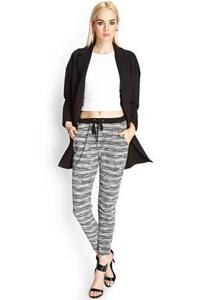

In [7]:
from IPython.display import Image
import os

file_path = os.path.join('/content/data_dir/images', os.listdir('/content/data_dir/images')[6])

Image(file_path)

### Пример детекции

In [8]:
from TFFashionDetection.tf_object_detector import ObjectDetector
import numpy as np

oject_detector = ObjectDetector('/content/inference_graph/frozen_inference_graph.pb', '/content/data_dir/annotations/label_map.pbtxt')

oject_detector.object_detection(image_dir='/content/data_dir/images', filename=file_path)
[[i['category_box'],i['img_name'],i['category_id'], i['category_proba']] for i in oject_detector.img_detections[:5]]
#oject_detector.img_detections
np.unique([i['category_name'] for i in oject_detector.img_detections])

array(['full-body', 'lower-body', 'upper-body'], dtype='<U10')

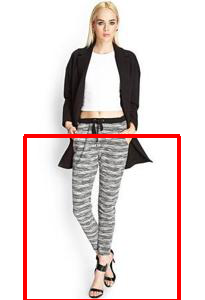

In [12]:
import sys
import os

import matplotlib.pyplot as plt
plt.switch_backend('agg')

sys.path.append(os.path.join('/content', 'models/research'))
from object_detection.utils import visualization_utils as vis_util

from PIL import Image as Pil_image

%matplotlib inline
boxes = np.array([oject_detector.img_detections[3]['category_box']])

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
# загружаем картинку и превращаем в массив
image = Pil_image.open(file_path)
image_np = load_image_into_numpy_array(image)
# накладываем на массив bounding boxes
vis_util.draw_bounding_boxes_on_image_array(image_np, boxes)
# сохраняем картинку на диск
result_file_path = os.path.join('/content', 'test.png')
vis_util.save_image_array_as_png(image_np, result_file_path)
# виуализируем картинку, которую сохранили
from IPython.display import Image
Image(result_file_path)

In [18]:
ls /content

checkpoints		      datalab		    inference_graph
checkpoint_save_20180513.zip  deep_detection_model  models
cocoapi			      fashion_data	    TFFashionDetection
data_dir		      frozen_model


### Получаем эмбеддинги изображений

In [0]:
from TFFashionDetection import feature_extraction as ftrs

ftrs.get_dir_embeddings(model_dir='/content/deep_detection_model', data_dir='/content/data_dir/images', num_top_predictions=1, max_images=500)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Изображение /content/data_dir/images/heathered_zip_pocket_sweatshorts_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/acid_wash_denim_romper_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tribal-inspired_woven_joggers_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/textured_stripe_smocked_dress_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/faux_leather_flared_skirt_img_00000042.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_dolman_sleeve_top_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/marled_knit_sweatpants_img_00000052.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/life_in_progress_chambray_joggers_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_

Изображение /content/data_dir/images/chambray_jumpsuit_img_00000029.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh-pocket_sweatshorts_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crisscross_back_knit_dress_img_00000027.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/california_graphic_tank_img_00000059.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tribal_print_kimono_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh_paneled_bodycon_dress_img_00000015.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral-embroidered_scalloped_dress_img_00000034.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tribal_print_leggings_img_00000045.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/colorblocked_french_terry_sweatshorts_

Изображение /content/data_dir/images/lace-paneled_crepe_dress_img_00000049.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/daisy_print_dress_img_00000078.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/diamond-stitch_sweatpants_img_00000040.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/zigzag_floral_print_skirt_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_windowpane_skirt_img_00000019.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/open-front_gauze_kimono_img_00000027.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/striped_waffle_knit_dress_img_00000011.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/caged_side_slit_tee_img_00000024.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_crochet_maxi_dress_img_00000001.

Изображение /content/data_dir/images/collarless_faux_fur_jacket_img_00000075.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_print_surplice_top_img_00000024.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ribbed_knit_cardigan_img_00000033.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_paisley_button-down_top_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/leaf_print_pocket_tee_img_00000019.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/chevron_print_dress_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_printed_side-tie_blouse_img_00000053.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/varsity_joggers_img_00000059.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_lace_top_img_00000047.jpg, дирек

Изображение /content/data_dir/images/printed_drop-waist_cami_dress_img_00000021.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/varsity-striped_brooklyn_sweatpants_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/high-neck_blouse_img_00000075.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_crochet_dress_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/belted_wide-leg_jumpsuit_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/embroidered_overlay_sheath_dress_img_00000042.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/la_ny_graphic_tee_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/love_sleep_boxy_hoodie_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tonal_crocodile-patterned_dress_

Изображение /content/data_dir/images/eyelash_lace_trim_blouse_img_00000094.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/fringed_open-front_cardigan_img_00000056.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/baroque_print_maxi_dress_img_00000019.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/sleeveless_snap-button_jumpsuit_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/open-knit_high-slit_maxi_dress_img_00000014.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_paisley_shift_dress_img_00000059.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_floral_strapless_dress_img_00000002.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/textured_floral_lace_romper_img_00000049.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/sheer_w

Изображение /content/data_dir/images/abstract_stripe_sheath_dress_img_00000038.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/high-waisted_matelot_skinny_jeans_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ribbed_shawl_cardigan_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/chambray_drawstring_joggers_img_00000060.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/rose_print_shorts_img_00000047.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/geo_tribal_print_a-line_skirt_img_00000021.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tie_dye_pencil_skirt_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_wave_patterned_dress_img_00000006.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ornate_print_skirt_img_

Изображение /content/data_dir/images/reversed_french_terry_sweatpants_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/distressed_cuffed_denim_shorts_img_00000042.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/rose_printed_chiffon_kimono_img_00000014.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/civil_colorblocked_mesh_tee_img_00000051.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/lace_love_maxi_dress_img_00000077.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/stone_washed_denim_dress_img_00000010.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/open-shoulder_eyelash_lace_dress_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/butterfly_sleeve_sheath_dress_img_00000060.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/paisle

Изображение /content/data_dir/images/super-soft_skinny_jeans_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ditsy_floral_skater_skirt_img_00000026.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crochet-paneled_cami_dress_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_floral_plaid_skirt_img_00000045.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/led_zeppelin_muscle_tee_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh_racerback_tank_img_00000057.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crisscross_back_jumpsuit_img_00000058.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/cutout_shoulder_knit_dress_img_00000031.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/longline_baseball_jersey_img_000000

Изображение /content/data_dir/images/acid_wash_distressed_jeans_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_print_embroidered_kimono_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/quilted_faux_leather_skirt_img_00000016.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tribal_print_leggings_img_00000083.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh_paneled_bodycon_dress_img_00000029.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/scalloped_lace_shorts_img_00000052.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_bodycon_dress_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/lace-paneled_fit_&_flare_dress_img_00000043.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/herringbone-patterned_cu

Изображение /content/data_dir/images/buttoned_drawstring_joggers_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_pencil_skirt_img_00000017.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/texture-striped_drawstring_shorts_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_mom_jeans_img_00000068.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/paisley_print_sun_dress_img_00000025.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/flat-front_skinny_jeans_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/zip-front_hoodie_img_00000030.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/lace_insert_bodycon_dress_img_00000073.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/oversized_boucl&eacute;_moto_jacket_img_000

Изображение /content/data_dir/images/pointelle_knit_maxi_dress_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_denim_cutoffs_img_00000015.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/hooded_varsity_jacket_img_00000069.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/asymmetrical_pencil_skirt_img_00000043.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/painted_floral_maxi_dress_img_00000033.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tropical_floral_crochet_dress_img_00000030.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_giraffe_print_tank_img_00000022.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/embroidered_crepe_shorts_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_basket_woven_top_img_00000026

Изображение /content/data_dir/images/tropical_floral_crochet_dress_img_00000036.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/menagerie_print_tee_img_00000040.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bejeweled_slit-sleeve_top_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mineral_wash_high-rise_skinny_jeans_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/longline_open-knit_cardigan_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/plunging_v-neckline_dress_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_midi_skirt_img_00000059.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bandana_print_layered_tee_img_00000006.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_a-line_skir

Изображение /content/data_dir/images/ribbed_knit_cami_dress_img_00000027.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mid-rise_-_acid_wash_skinny_jeans_img_00000006.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/micro-stripe_v-neck_tee_img_00000011.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/metallic_brocade_mini_skirt_img_00000044.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/rose-patterned_bodycon_dress_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/striped_knit_drawstring_hoodie_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/dropped_hem_t-shirt_dress_img_00000010.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/lace_inset_minimalist_romper_img_00000011.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crinkled_cr

Изображение /content/data_dir/images/be_true_graphic_tunic_tank_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/acid_wash_denim_romper_img_00000071.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/safari_animal_print_shorts_img_00000036.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh-paneled_workout_shorts_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/space_dye_yoga_leggings_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/sequined_chiffon_maxi_dress_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_wide-leg_culottes_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/animal_print_satin_blouse_img_00000015.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/darted_sheath_dress_img_00

Изображение /content/data_dir/images/you_post_too_much_tee_img_00000011.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/rock_n_roll_tee_img_00000054.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/embroidered_cutout_bomber_jacket_img_00000050.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/marled_terrycloth_pj_sweatpants_img_00000031.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_double-breasted_coat_img_00000054.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/t-back_high-slit_dress_img_00000022.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ribbed_knit_cropped_sweater_img_00000010.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/be_cool_crop_top_img_00000067.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/geo_tribal_print_bodycon_dress_img_000

Изображение /content/data_dir/images/split-neck_chiffon_blouse_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_surplice_dress_img_00000004.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_slub_knit_tee_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mixed_ornate_print_blouse_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bandana_print_sweatshorts_img_00000034.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/box-pleated_maxi_dress_img_00000044.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral-embroidered_lace-up_dress_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/textured_knit_a-line_dress_img_00000032.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_print-sleeved_tee_

Изображение /content/data_dir/images/floral_lace_skater_skirt_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/time_for_that_graphic_tank_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_knit_skater_dress_img_00000048.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/scuba_knit_pencil_skirt_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pintucked_button-down_blouse_img_00000095.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_slim_denim_jeans_img_00000052.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/hashtags_graphic_muscle_tee_img_00000014.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_peasant_blouse_img_00000053.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_mock_neck_d

In [0]:
import pickle

embeds_file = '/content/data_dir/img_embeddings.pkl'

embeds = pickle.load(open(embeds_file, 'rb'))

In [0]:
from sklearn.neighbors import KDTree
import numpy as np
num_embeds = len(embeds)
embed_index = dict(zip(embeds.keys(), range(num_embeds)))
inverted_index = {j:i for i,j in embed_index.items()}

embed_matrix = np.vstack([embeds[k] for k in embed_index])

kdt = KDTree(embed_matrix, leaf_size=30, metric='euclidean')

In [0]:
test_id = embed_index[list(embed_index.keys())[620]]

test_example = embed_matrix[test_id]
sim_query = kdt.query(test_example.reshape(1,-1), k=5, return_distance=False)

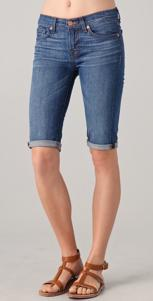

In [46]:
from IPython.display import Image
import os

#file_path = '/content/data_dir/images/americana_skinny_jeans_img_00000030.jpg'
#file_path = '/content/data_dir/images/zippered_sweatpants_img_00000046.jpg'
file_path = inverted_index[sim_query[0][0]]

Image(file_path)

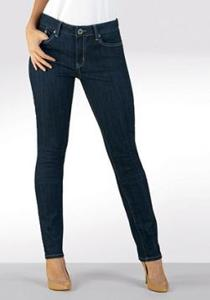

In [47]:
file_path = inverted_index[sim_query[0][1]]

Image(file_path)